In [25]:
%env XLA_PYTHON_CLIENT_MEM_FRACTION=.1

import numpy as np
import jax.numpy as jnp
import jax.scipy as jsc
import matplotlib.pyplot as plt
from jax import random
from scipy.linalg import circulant
from jax import grad, jit, vmap, value_and_grad
import optax
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

import os
import sys

file = open("../../../../meta.txt")
home = file.read().replace("\n", "/")
file.close()
    
p = os.path.abspath(home+'mypylib')
if p not in sys.path:
    sys.path.append(p)

import chunGP as gp

#        sigma=np.squeeze(gp.getosig(tau))



def qdyanmics(sigma,pa):
    resolution=10000#100000000
    trapz_n=10000
    chunk_size=10000

    Ls=jnp.arange(2,20)
    tau=gp.getTau(pa)

    X=jnp.ones((2,2))/np.sqrt(2)
    
    converter=gp.getConverter_chunk_save_load(tau=tau,resolution=resolution,trapz_n=trapz_n,chunk_size=chunk_size,silence=False,home=home)
    load_names_te=gp.getSCK_fast_and_save(X,X,converter,mh0=0,mw0=0,mh=0,mw=0,sigma=sigma,L=jnp.max(Ls),input_unit_ball=False,home=home,label='test')
    qs=[]
    for g, L in enumerate(Ls):
        K=np.load(load_names_te[g])
        qs.append(K[0,0])
    return qs

        
            

env: XLA_PYTHON_CLIENT_MEM_FRACTION=.1


In [55]:
#sigma=1
pa=0.1
tau=gp.getTau(pa)
sigma_op=np.squeeze(gp.getosig(tau))

qs_op=qdyanmics(sigma_op,pa)

sigmas=np.linspace(sigma_op*0.5,sigma_op*1.5,10)
qss=[]
for sigma in sigmas:
    qss.append(qdyanmics(sigma,pa))
qss=np.array(qss)
    

loaded from a file
0th layer kernel saved
1th layer kernel saved
2th layer kernel saved
3th layer kernel saved
4th layer kernel saved
5th layer kernel saved
6th layer kernel saved
7th layer kernel saved
8th layer kernel saved
9th layer kernel saved
10th layer kernel saved
11th layer kernel saved
12th layer kernel saved
13th layer kernel saved
14th layer kernel saved
15th layer kernel saved
16th layer kernel saved
17th layer kernel saved
done
loaded from a file
0th layer kernel saved
1th layer kernel saved
2th layer kernel saved
3th layer kernel saved
4th layer kernel saved
5th layer kernel saved
6th layer kernel saved
7th layer kernel saved
8th layer kernel saved
9th layer kernel saved
10th layer kernel saved
11th layer kernel saved
12th layer kernel saved
13th layer kernel saved
14th layer kernel saved
15th layer kernel saved
16th layer kernel saved
17th layer kernel saved
done
loaded from a file
0th layer kernel saved
1th layer kernel saved
2th layer kernel saved
3th layer kernel sav

Text(0, 0.5, 'K(x,x)')

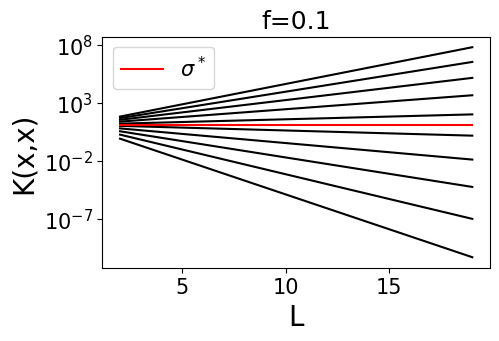

In [56]:
Ls=jnp.arange(2,20)

fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(Ls,qss.T,c='k');
ax.plot(Ls,qs_op,c='r',label=r'$\sigma^*$')
ax.set_yscale('log')
ax.legend()
ax.set_title('f={}'.format(pa))
ax.set_xlabel('L',fontsize=20)
ax.set_ylabel('K(x,x)',fontsize=20)


In [30]:
sigma_op

NameError: name 'sigma_op' is not defined